## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df = pd.read_csv('QueryResults (1).csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [7]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2519  2023-09-01 00:00:00     php   2099
2520  2023-09-01 00:00:00  python  10306
2521  2023-09-01 00:00:00       r   2197
2522  2023-09-01 00:00:00    ruby    214
2523  2023-09-01 00:00:00   swift    998


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
df.count()

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [10]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43347
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,399693
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1603091
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,799745
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51287
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,70975
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1907383
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2513065
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67868


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [11]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
# Convert Entrire Column
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [22]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.fillna(0, inplace=True)


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
print(reshaped_df.shape)

(183, 14)


In [15]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [21]:
reshaped_df.count()



TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

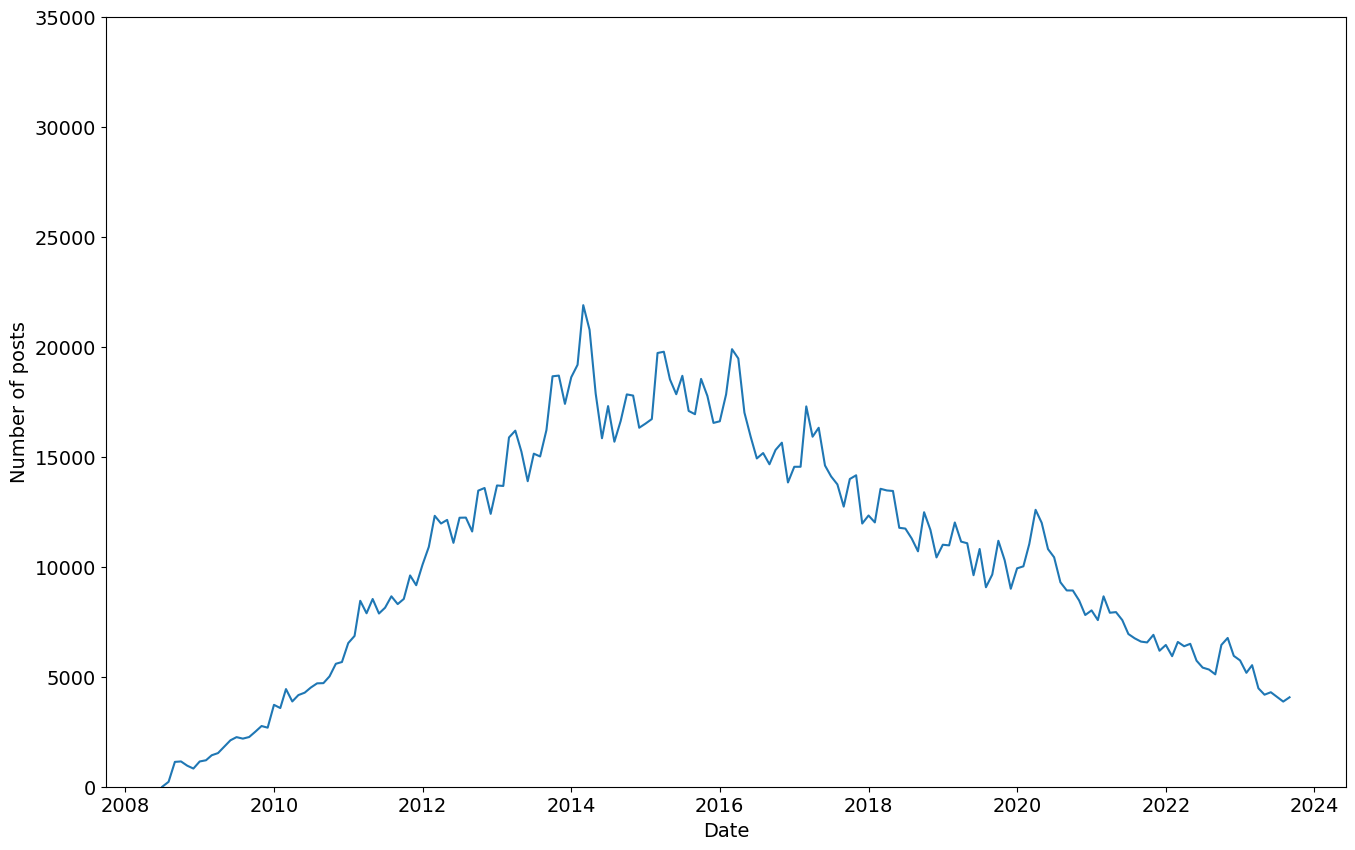

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

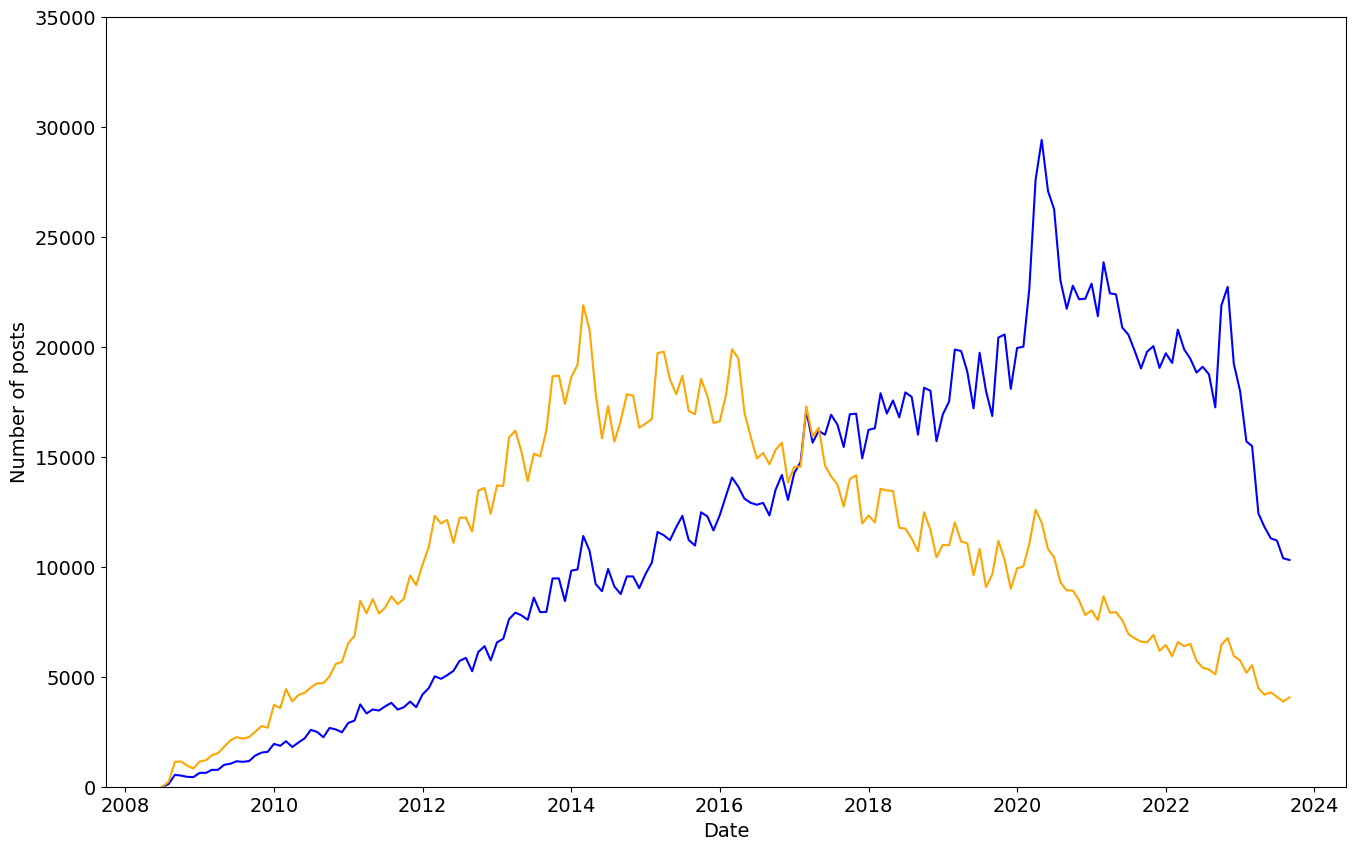

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python', color='blue')
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java', color='orange')

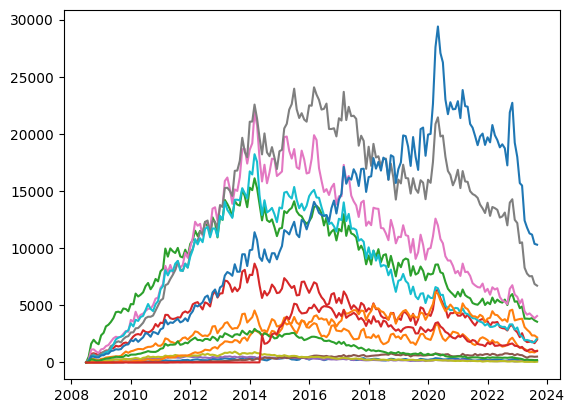

In [31]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)

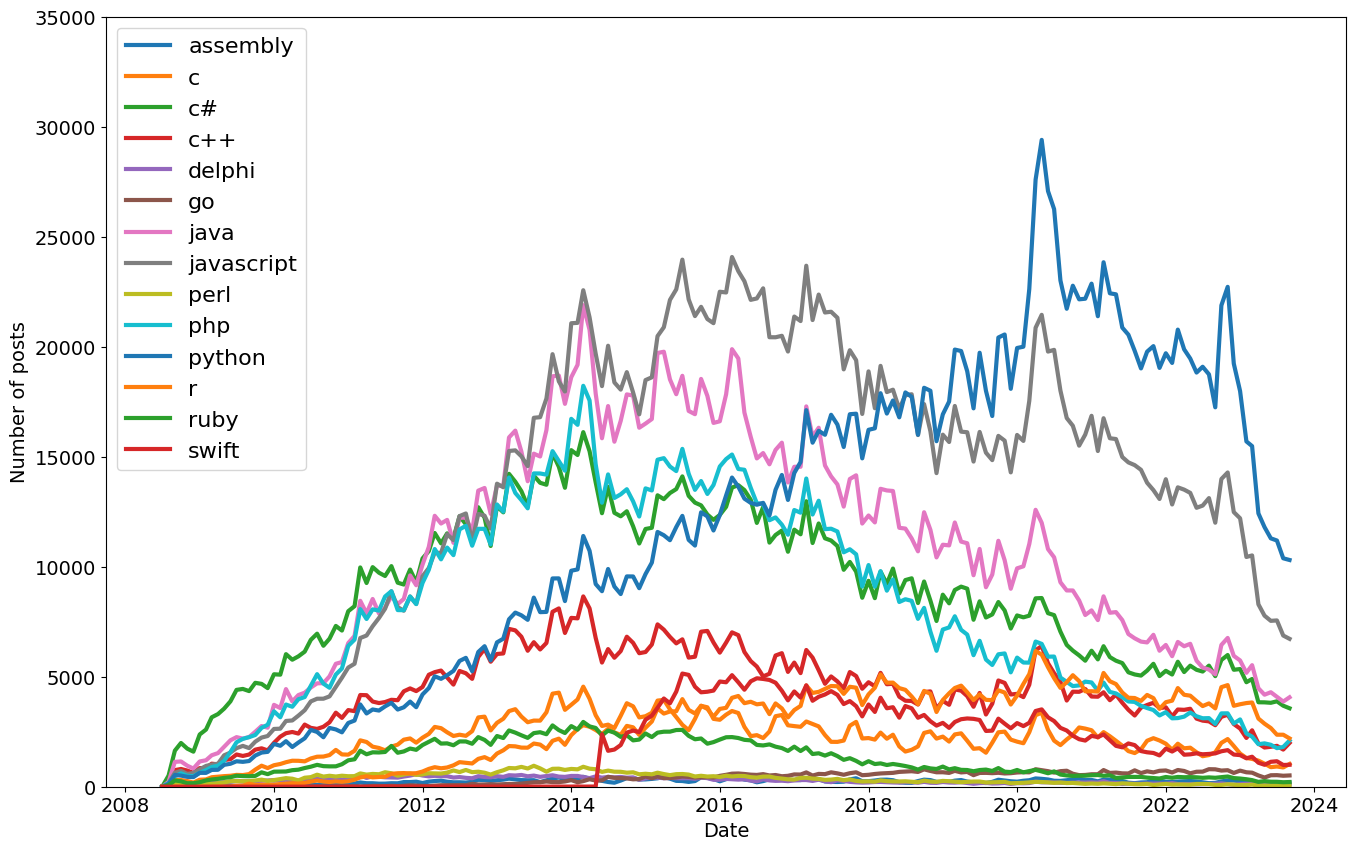

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name, linewidth=3)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

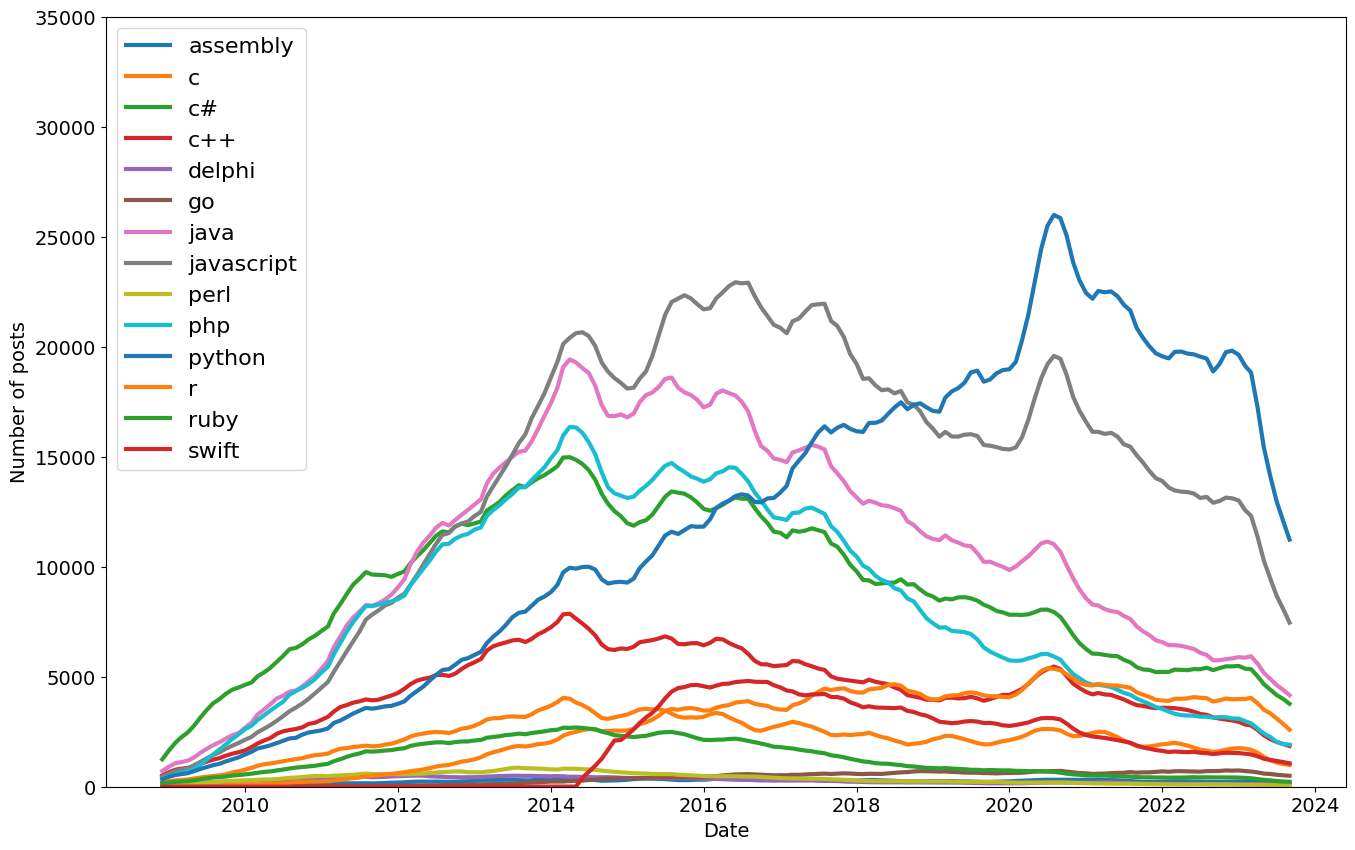

In [39]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name, linewidth=3)
plt.legend(fontsize=16)